# House Prices Regression

- Ricardo Méndez 21289
- Sara Echeverría 21371
- Sebastián Juárez 21471

## Análisis exploratorio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\euroc\AppData\Local\Temp\ipykernel_5352\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
file = "data/train.csv"
df = pd.read_csv(file)

In [3]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## ¿Cuál es la distribución de precios de venta? ¿Es simétrica o sesgada hacia algún lado?

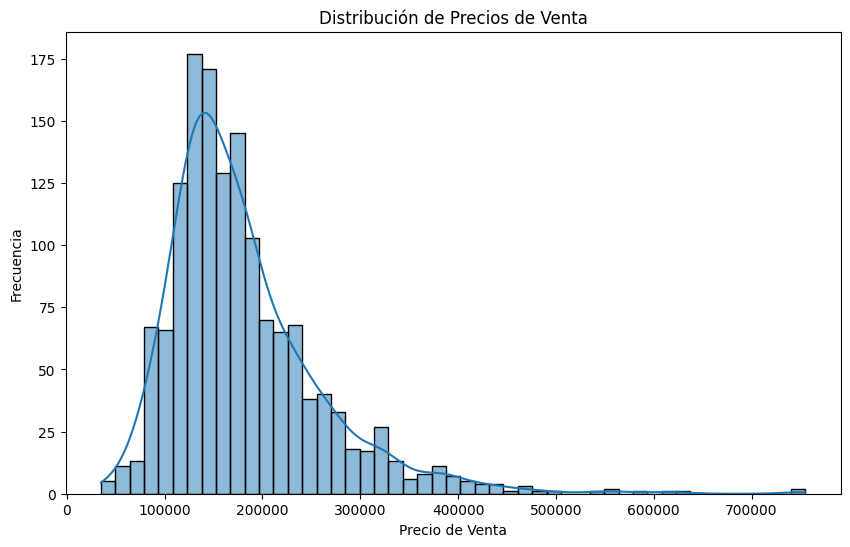

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

## ¿Cómo se correlaciona el precio de venta con otras variables numéricas, como el tamaño del lote, el área habitable, el número de habitaciones?

In [4]:
numeric_vars = ['LotArea', 'GrLivArea', 'TotRmsAbvGrd']
correlation_matrix = df[['SalePrice'] + numeric_vars].corr()
print("Matriz de correlación con variables numéricas:\n", correlation_matrix)

Matriz de correlación con variables numéricas:
               SalePrice   LotArea  GrLivArea  TotRmsAbvGrd
SalePrice      1.000000  0.263843   0.708624      0.533723
LotArea        0.263843  1.000000   0.263116      0.190015
GrLivArea      0.708624  0.263116   1.000000      0.825489
TotRmsAbvGrd   0.533723  0.190015   0.825489      1.000000


## ¿Cómo varía el precio de venta en función de variables categóricas como el tipo de zona de zonificación, la ubicación del vecindario, la calidad general de la vivienda?

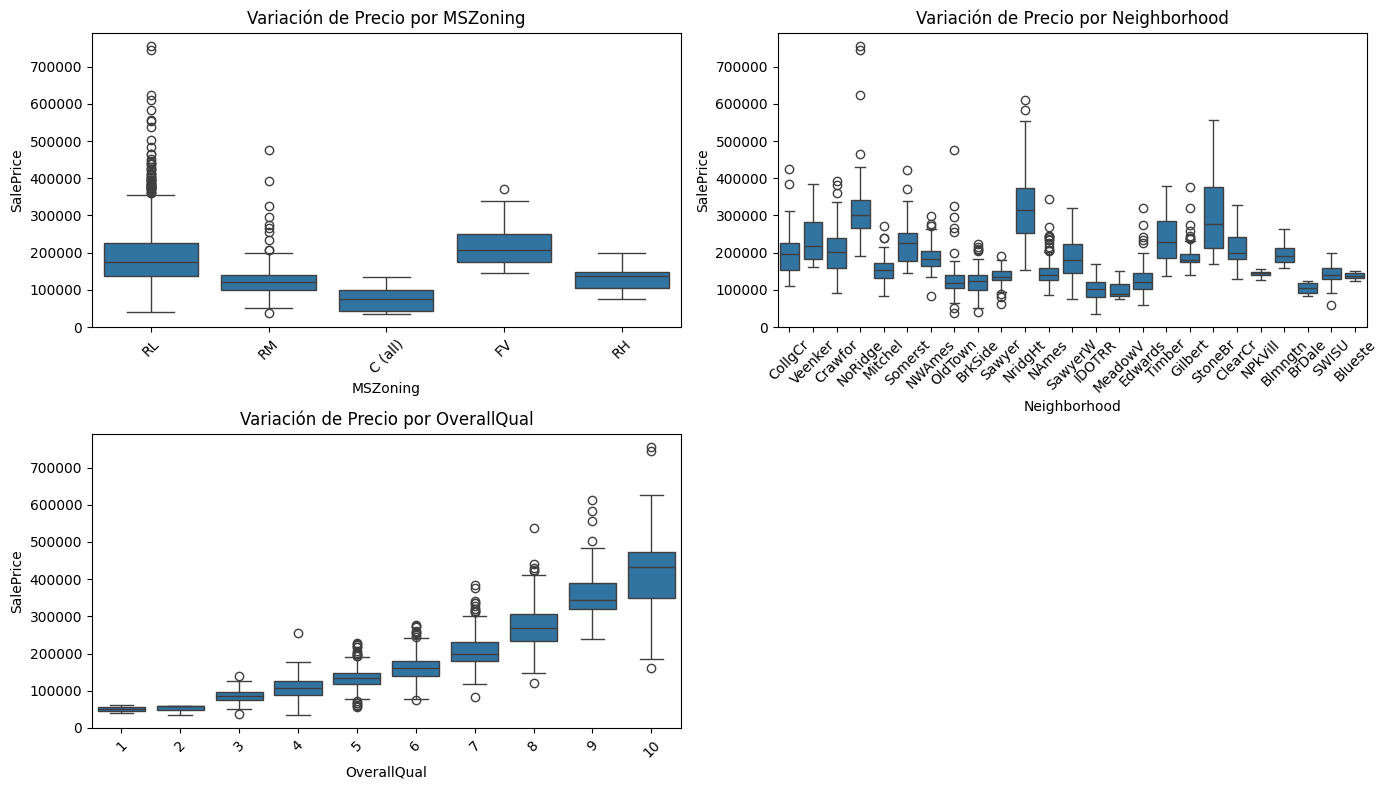

In [5]:
categorical_vars = ['MSZoning', 'Neighborhood', 'OverallQual']
plt.figure(figsize=(14, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.title(f'Variación de Precio por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ¿Hay alguna relación evidente entre el precio de venta y el año de construcción o el año de remodelación?

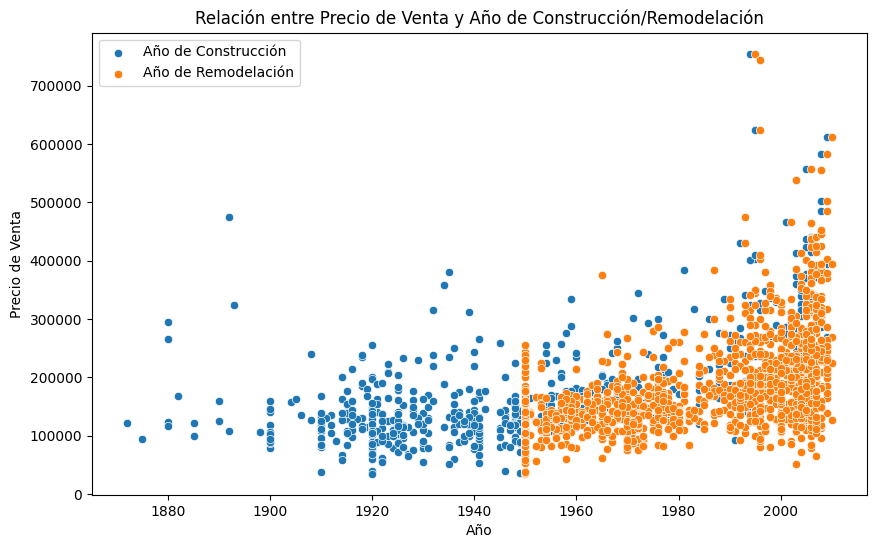

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, label='Año de Construcción')
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, label='Año de Remodelación')
plt.title('Relación entre Precio de Venta y Año de Construcción/Remodelación')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()

## ¿Hay alguna relacion entre las casas que tengan piscina o no?

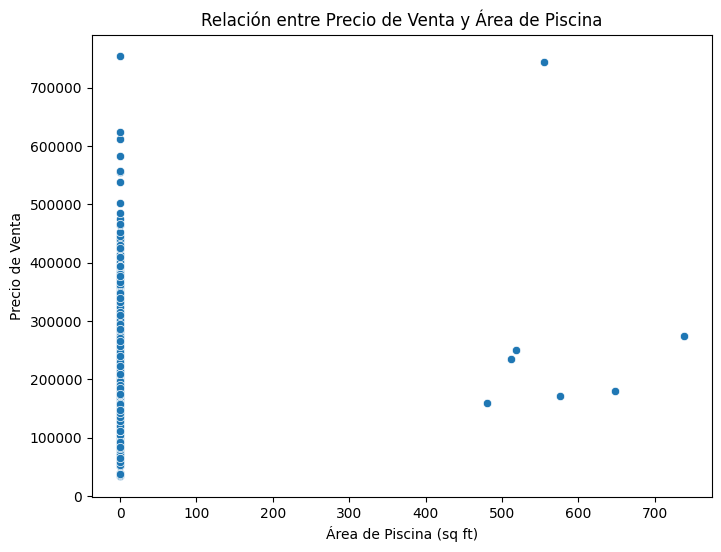

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.title('Relación entre Precio de Venta y Área de Piscina')
plt.xlabel('Área de Piscina (sq ft)')
plt.ylabel('Precio de Venta')
plt.show()

## Descripción de variables
- LotArea: Tamaño del lote en pies cuadrados
- GrLivArea: Superficie habitable sobre el nivel del suelo (suelo) en pies cuadrados
- TotRmsAbvGrd: Total de habitaciones sobre el suelo (no incluye baños)
- MSZoning: La clasificación general de zonificación.
- Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames
- OverallQual: Calidad general de materiales y acabados.
- YearBuilt: Fecha de construcción original
- YearRemodAdd: Fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones ni adiciones)
- PoolArea: Área de piscina en pies cuadrados

## Data Split

In [8]:
from sklearn.model_selection import train_test_split

X = df[['LotArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21562)


In [7]:
y_train

955     145000
245     241500
458     161000
1291    119500
998      91000
         ...  
940     150900
108     115000
621     240000
229     192500
805     227680
Name: SalePrice, Length: 1168, dtype: int64

## Regresión de una variable

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

c:\Users\euroc\Desktop\U\IA\IA-Phising-Website-Detection\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()